In [67]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
%matplotlib inline

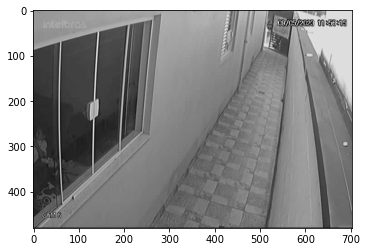

In [68]:
# Exibindo uma imagem exemplo
modelo = cv2.imread(r'C:\Users\itall\Data Science\FTP Server\dvr\192.168.15.2\2023-05-09\006\11\ch6_20230509115615_E.jpg')
plt.imshow(modelo_gray, cmap='gray')
plt.show()

# Rede Neural Convolucional

Para a coleta de dados, utilizei o método <b>image_dataset_from_directory</b> do keras. Dentro do caminho informado, haviam duas pastas, uma com imagens da classe 0 e outra com imagens da classe 1. Esse método já cria o dataset e prepara ele em batches, prontos para serem consumidos pelo keras.

### 1. Load Date

In [69]:
import tensorflow as tf

In [90]:
# variável DATA contem 233 imagens dividias em batches de tamanho 32 (config padrão)

data = tf.keras.utils.image_dataset_from_directory(os.path.join('dvr', '192.168.15.2', 'treino(pessoa)'))

Found 233 files belonging to 2 classes.


In [91]:
#Criando um iterador para os batches criados em data
data_iterator = data.as_numpy_iterator()

In [92]:
batch = data_iterator.next()

In [93]:
# Exibindo matriz de uma imagem
batch[0][0]

array([[[118.      , 124.      , 110.      ],
        [118.      , 124.      , 110.      ],
        [118.      , 124.      , 110.      ],
        ...,
        [220.      , 220.      , 220.      ],
        [220.      , 220.      , 220.      ],
        [220.      , 220.      , 220.      ]],

       [[118.      , 124.      , 110.      ],
        [118.      , 124.      , 110.      ],
        [118.      , 124.      , 110.      ],
        ...,
        [220.      , 220.      , 220.      ],
        [220.      , 220.      , 220.      ],
        [220.      , 220.      , 220.      ]],

       [[118.      , 124.      , 110.      ],
        [118.      , 124.      , 110.      ],
        [118.      , 124.      , 110.      ],
        ...,
        [220.      , 220.      , 220.      ],
        [220.      , 220.      , 220.      ],
        [220.      , 220.      , 220.      ]],

       ...,

       [[ 84.60156 ,  95.60156 ,  79.60156 ],
        [108.60156 , 119.60156 , 103.60156 ],
        [ 68.5     ,  

In [94]:
# Exibindo variáveis respostas (y) de um dos batches
batch[1]

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

### 2. Scale Data

In [95]:
# As imagens possuem valores entre 0 e 255 (RGB). Dividir por 255 para scalar valores para 0~1
data = data.map(lambda x, y: (x/255, y))

In [96]:
# validando se as imagens foram reescaladas corretamente...
data.as_numpy_iterator().next()

(array([[[[0.36078432, 0.38039216, 0.35686275],
          [0.36078432, 0.38039216, 0.35686275],
          [0.36078432, 0.38039216, 0.35686275],
          ...,
          [0.64166665, 0.69264704, 0.6573529 ],
          [0.64705884, 0.69803923, 0.6627451 ],
          [0.6514706 , 0.702451  , 0.6671569 ]],
 
         [[0.36078432, 0.38039216, 0.35686275],
          [0.36078432, 0.38039216, 0.35686275],
          [0.36078432, 0.38039216, 0.35686275],
          ...,
          [0.64166665, 0.69264704, 0.6573529 ],
          [0.64705884, 0.69803923, 0.6627451 ],
          [0.6514706 , 0.702451  , 0.6671569 ]],
 
         [[0.36078432, 0.38039216, 0.35686275],
          [0.36078432, 0.38039216, 0.35686275],
          [0.36078432, 0.38039216, 0.35686275],
          ...,
          [0.64166665, 0.69264704, 0.6573529 ],
          [0.64705884, 0.69803923, 0.6627451 ],
          [0.6514706 , 0.702451  , 0.6671569 ]],
 
         ...,
 
         [[0.35168505, 0.39090073, 0.34776348],
          [0.42166

### 3. Split Data

In [97]:
# Exibir a quantidade de batches do conjunto de dados
len(data)

8

In [98]:
# Divisão temporária, manual
train_size = 5
val_size = 2
test_size = 1

In [99]:
# Separando os dados em treino, validação e teste
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### 4. Build Deep Learning Model

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [47]:
model = Sequential()

#16 filtros, atuar em áreas 3x3 e descolar de 1 em 1 pixel.
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
#32 filtros, atuar em áreas 3x3 e descolar de 1 em 1 pixel.
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
# última camada única, com sigmoid, para devolver resultados entre 0 e 1
model.add(Dense(1, activation='sigmoid'))

In [101]:
# Compilando o modelo
model.compile('adam',
             loss=tf.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

### 4. Train

In [50]:
hist = model.fit(train, epochs=30, validation_data=val)

Epoch 1/30
5/5 [==============================] - 6s 1s/step - loss: 1.0939 - accuracy: 0.4625 - val_loss: 0.7226 - val_accuracy: 0.3281
Epoch 2/30
5/5 [==============================] - 6s 1s/step - loss: 0.6523 - accuracy: 0.6250 - val_loss: 0.6763 - val_accuracy: 0.6250
Epoch 3/30
5/5 [==============================] - 7s 1s/step - loss: 0.6775 - accuracy: 0.6375 - val_loss: 0.6782 - val_accuracy: 0.5781
Epoch 4/30
5/5 [==============================] - 6s 1s/step - loss: 0.6715 - accuracy: 0.6000 - val_loss: 0.6276 - val_accuracy: 0.6719
Epoch 5/30
5/5 [==============================] - 6s 1s/step - loss: 0.6415 - accuracy: 0.6438 - val_loss: 0.6503 - val_accuracy: 0.6250
Epoch 6/30
5/5 [==============================] - 7s 1s/step - loss: 0.6393 - accuracy: 0.6687 - val_loss: 0.6589 - val_accuracy: 0.5938
Epoch 7/30
5/5 [==============================] - 7s 1s/step - loss: 0.5972 - accuracy: 0.6812 - val_loss: 0.5639 - val_accuracy: 0.7344
Epoch 8/30
5/5 [=========================

### 5. Plot Performance

<IPython.core.display.Javascript object>


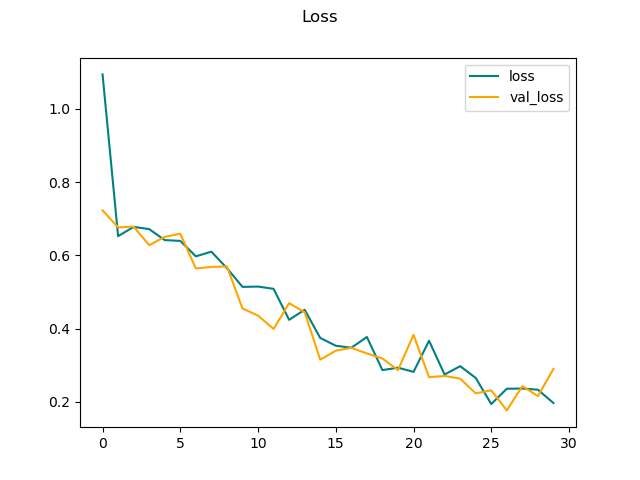

In [51]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


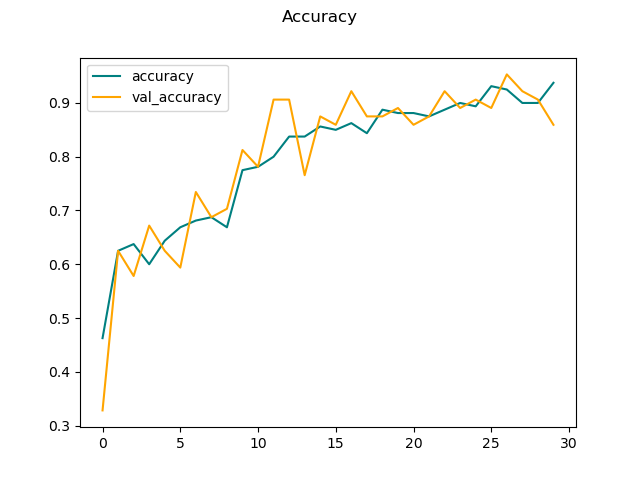

In [52]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy')
plt.legend()
plt.show()

### 6 . Evaluate

In [53]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [54]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [55]:
for batch in test.as_numpy_iterator():
    x, y = batch
    y_pred = model.predict(x)
    pre.update_state(y, y_pred)
    rec.update_state(y, y_pred)
    acc.update_state(y, y_pred)

In [56]:
print(f'Reccal: {rec.result()}')
print(f'Precision: {pre.result()}')
print(f'Accuracy: {acc.result()}')

Reccal: 0.6666666865348816
Precision: 1.0
Accuracy: 0.8888888955116272


### 7. testando a quente (dados online)

In [57]:
from os import listdir
from os.path import isfile, join

# Retornar arquivos em um diretpório
def fileInDirectory(my_dir: str):
    lista = []
    for path, currentDirectory, files in os.walk(diretorio):
        for file in files:
            if file.startswith("ch6"):
                lista.append(os.path.join(path, file))
    return(lista)

In [58]:
# Função para comparar duas listas de arquivos e devolver somente arquivos novos
def listComparison(OriginalList: list, NewList: list):
    differencesList = [x for x in NewList if x not in OriginalList]
    return(differencesList)

In [59]:
def avaliar_nova_foto(path_da_foto):
    img = cv2.imread(path_da_foto)
    img_resized = tf.image.resize(img, (256,256))
    predict = model.predict(np.expand_dims(img_resized/255, 0))[0][0]
    if predict >= 0.5:      
        ax.text(200, 450, f'Detecção de pessoa:  {round(predict*100,1)}% ', fontsize = 18, color='red',
                bbox = dict(color = 'white'))
    else:
        ax.text(200, 450, f'     Sem detecção:  {round(predict*100,1)}%     ', fontsize = 18, color='blue',
                bbox = dict(color = 'white'))
        
    line1.set_data(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    figure.canvas.draw()
    figure.canvas.flush_events()


In [60]:
import time

# função para ficar analisando arquivos novos no endereço do FTP para passar pelo modelo.
def fileWatcher(my_dir: str, pollTime: int):
#     plt.ion()
#     figure, ax = plt.subplots(figsize=(10, 8))
#     line1 = ax.imshow(modelo)
    while True:
        if 'watching2' not in locals(): #Check if this is the first time the function has run
            previousFileList = fileInDirectory(my_dir)
            watching2 = 1
            print('First Time OK. Running...')
            #print(previousFileList)
        
        time.sleep(pollTime)
        
        newFileList = fileInDirectory(my_dir)
        
        fileDiff = listComparison(previousFileList, newFileList)
        
        previousFileList = newFileList
        if len(fileDiff) == 0: continue
        
       
        for f in fileDiff:
            
            #print(f)
            avaliar_nova_foto(f)

<IPython.core.display.Javascript object>


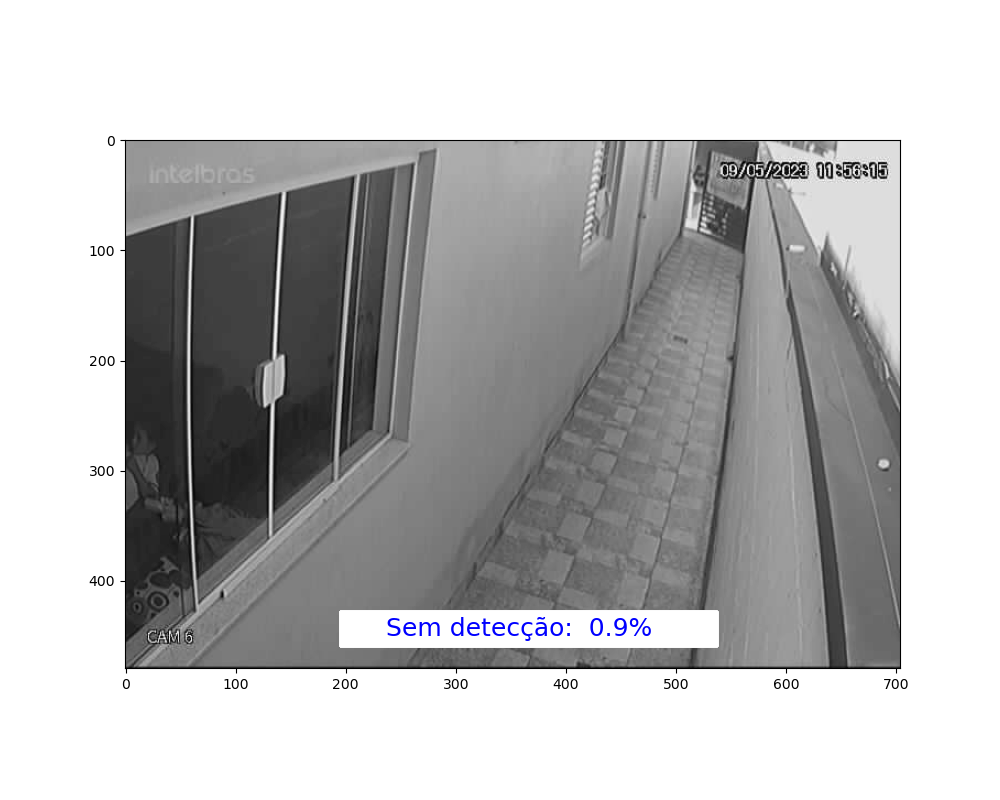

First Time OK. Running...


KeyboardInterrupt: 

In [63]:
diretorio = r"C:\Users\itall\Data Science\FTP Server\dvr"

plt.ion()
figure, ax = plt.subplots(figsize=(10, 8))
line1 = ax.imshow(modelo)
plt.show()

fileWatcher(diretorio, 0.5)